<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/Support_vector_Machines_ML_Alogorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPPORT VECTOR CLASSIFIERS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic dataset
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                     n_informative=2, n_clusters_per_class=2, random_state=42)
X

array([[-0.99910178, -0.66386   ],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       ...,
       [-0.10126746, -1.59017563],
       [ 0.64376105, -0.78053855],
       [ 0.69852984, -1.27940455]])

<Axes: >

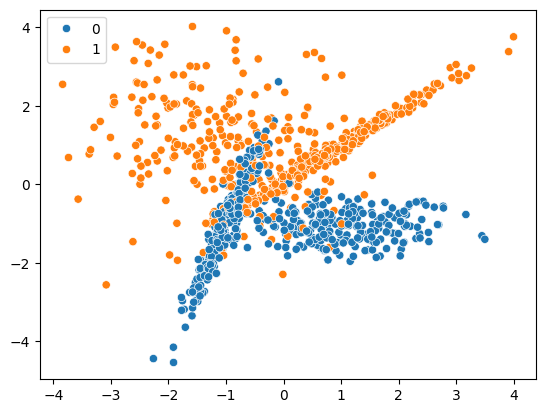

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
# PRINT EVALUTION
print(classification_report(y_test, y_pred))

[[146   1]
 [ 25 128]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       147
           1       0.99      0.84      0.91       153

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



In [ ]:
## RBF KERNAL

# Print classification report
model_rbf = SVC(kernel='rbf', gamma='scale')  # You can tune gamma as needed
model_rbf.fit(X_train, y_train)

# Predict on test data
y_pred_rbf = model_rbf.predict(X_test)

# Print classification report
print("SVM with RBF Kernel")
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

SVM with RBF Kernel
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       147
           1       0.99      0.84      0.91       153

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300

[[146   1]
 [ 24 129]]


In [ ]:
##POLYNIMIAL KERNAL

model_poly = SVC(kernel='poly', degree=3, gamma='scale', coef0=1)  # You can adjust degree/coef0
model_poly.fit(X_train, y_train)

# Predict on test data
y_pred_poly = model_poly.predict(X_test)

# Print classification report
print("SVM with Polynomial Kernel")
print(classification_report(y_test, y_pred_poly))

SVM with Polynomial Kernel
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       147
           1       0.99      0.85      0.92       153

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [ ]:
##SIGMOID KERNAL
model_sigmoid = SVC(kernel='sigmoid', gamma='scale', coef0=0)
model_sigmoid.fit(X_train, y_train)

# Predict on test data
y_pred_sigmoid = model_sigmoid.predict(X_test)

# Print classification report
print("SVM with Sigmoid Kernel")
print(classification_report(y_test, y_pred_sigmoid))

SVM with Sigmoid Kernel
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       147
           1       0.97      0.84      0.90       153

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],      # Ignored for 'linear'
    'degree': [2, 3],                   # Used only for 'poly'
    'coef0': [-1, 0, 1]                 # Used for 'poly' and 'sigmoid'
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'coef0': [-1, 0, 1],
                         'degree': [2, 3], 'gamma': ['scale', 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [ ]:
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       147
           1       0.99      0.84      0.91       153

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300

[[146   1]
 [ 24 129]]


**SVM KERNALS IMPLEMENTATION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [ ]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])
x1

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

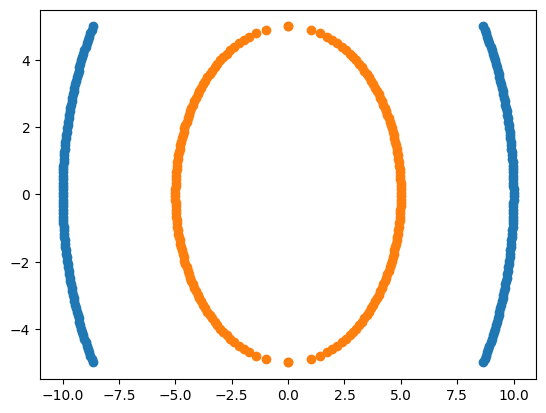

In [ ]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [ ]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=pd.concat([df1,df2],axis=0)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
X=df.iloc[:, :2]
y=df.Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
y_train

,Y
47,1
110,0
16,0
66,0
153,0
...,...
71,0
106,0
70,1
148,1


In [ ]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1_X2']=(df['X1'] *df['X2'])
df.head(5)

,X1,X2,Y,X1_Square,X2_Square,X1_X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [ ]:
X=df[['X1','X2','X1_Square','X2_Square','X1_X2']]
y=df['Y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## FOR #3D REPRESENTATION

import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1_X2',
              color='Y')
fig

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1_X2',
              color='Y', opacity=0.7)
fig

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel='poly')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

**SUPPORT VECTOR REGRESSION**

In [ ]:
jst like nrml regression we will apply anthee